[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Example 9.1 and Figures 9.3, 9.5, 9.6 and 9.14 

Analysis of the sample mean as an estimator of the height in a population\
Topics: Sample mean, law of large numbers, bias, standard error, consistency, Chebyshev bound, convergence in probability, central limit theorem, convergence in distribution

Author: Carlos Fernandez-Granda\
Data source: http://mreed.umtri.umich.edu/mreed/downloads.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import norm
from numpy.random import default_rng
import matplotlib
matplotlib.rcParams['text.usetex'] = True
rng = default_rng(2021)

font_size = 15
font_size_legend = 15
font_size_ticks = 15

data = pd.read_csv ("../data/ANSUR II MALE Public.csv", encoding='latin-1')

stature = data['stature'] / 10.
N = len(stature)
population_mean = np.mean(stature)
population_std = np.std(stature)
print("N: " + str(len(stature)))
print("Population mean: " + str(round(population_mean,2)))
print("Population standard deviation: " + str(round(population_std,2)))

N: 4082
Population mean: 175.62
Population standard deviation: 6.85


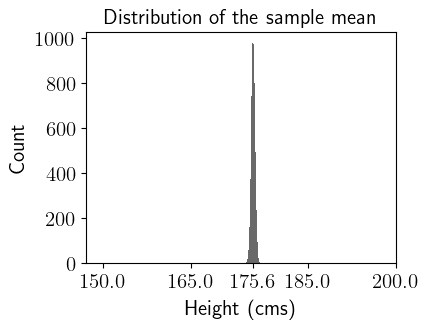

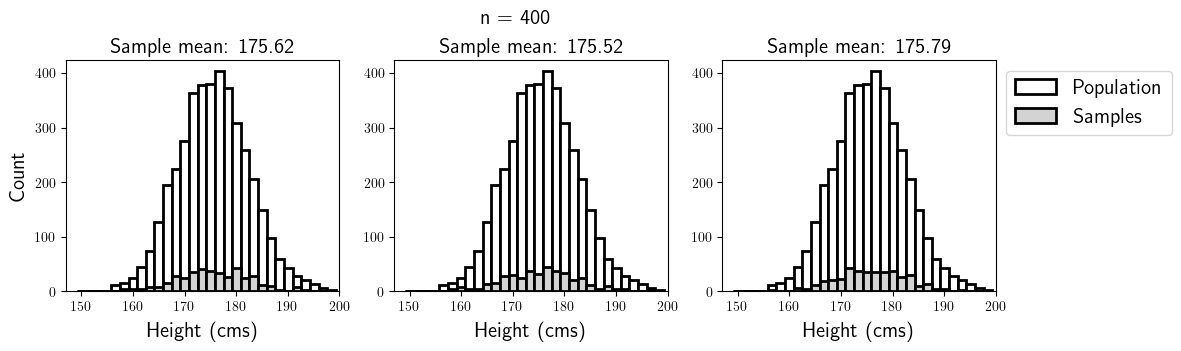

In [5]:
n_bins = 30
x_min = 147
x_max = 200
tries = 3
n = 400

more_tries = int(1e4)
sample_means = np.zeros(more_tries)
for ind_tries in range(more_tries):
    samples = rng.choice(stature,n,replace=True)
    sample_means[ind_tries] = np.mean(samples)
plt.figure(figsize=(4,3))
plt.xticks([150,165,175.6,185,200],fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.hist(sample_means,bins=n_bins,color='dimgray',
              linewidth=2,density=False)
plt.xlim([x_min,x_max])
plt.ylabel(r"Count",fontsize=font_size,labelpad=5)
plt.xlabel('Height (cms)',fontsize=font_size,labelpad=5)
plt.title("Distribution of the sample mean",fontsize=font_size_legend)

fig, axes = plt.subplots(1, 3, figsize=(12,3),width_ratios=[1,1,1])
fig.suptitle("n = " + str(n),fontsize=font_size,y = 1.05)

for ind in range(tries):
    samples = rng.choice(stature,n,replace=True)
    
    (aux_1, bins,aux_2) = axes[ind].hist(stature,bins=n_bins,color='white', edgecolor='black',
              linewidth=2,label="Population")
    axes[ind].hist(samples,bins=bins,color='lightgray', edgecolor='black',
              linewidth=2,label="Samples")
    axes[ind].set_xlim([x_min,x_max])
    if ind == 0:
        axes[ind].set_ylabel("Count",fontsize=font_size,labelpad=5)
    axes[ind].set_xlabel('Height (cms)',fontsize=font_size,labelpad=5)
    axes[ind].set_title("Sample mean: " + str(round(np.mean(samples),2)),fontsize=font_size);
    if ind == 2:
        axes[ind].legend(fontsize=font_size_legend,bbox_to_anchor=(1, 1), loc='upper left', ncol=1);

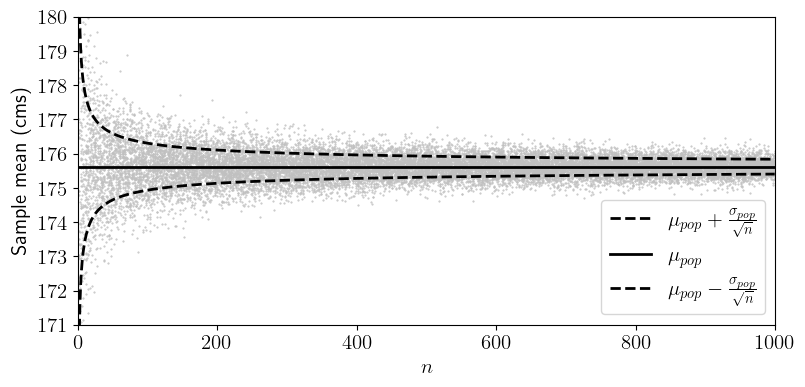

In [6]:
# Illustration of the consistency of the sample mean, which converges to the population mean as the number of random samples grows
tries = 20#int(1e2)
n_max = 1000
n_vals = np.arange(1,n_max,1)
sample_mean_average = np.zeros(N)
sample_mean_std = np.zeros(N)

ymin = 171
ymax = 180

plt.figure(figsize=(9,4))
plt.xticks(fontsize=font_size) 
plt.yticks(fontsize=font_size)
plt.ylim(ymin,ymax)
plt.xlim(0,n_max)
for ind_n,n in enumerate(n_vals):
    sample_means = np.zeros(tries)
    for ind_tries in range(tries):
        samples = rng.choice(stature,n,replace=True)
        sample_means[ind_tries] = np.mean(samples)
    plt.plot(n * np.ones(tries),sample_means,'.',ms=1,color="silver",rasterized=True)
    sample_mean_average[ind_n] = np.mean(sample_means)
    sample_mean_std[ind_n] = np.std(sample_means) 
plt.plot(n_vals,population_mean + population_std/np.sqrt(n_vals),lw=2,ls='dashed',color='black',
         label=r"$\mu_{pop}+\frac{\sigma_{pop}}{\sqrt{n}}$")
plt.plot(n_vals,np.ones(len(n_vals))*population_mean,lw=2,color='black',
         label=r"$\mu_{pop}$")
plt.plot(n_vals,population_mean - population_std/np.sqrt(n_vals),lw=2,ls='dashed',color='black',
         label=r"$\mu_{pop}-\frac{\sigma_{pop}}{\sqrt{n}}$")
plt.xlabel(r"$n$",fontsize=font_size)
plt.ylabel(r'Sample mean (cms)',fontsize=font_size,labelpad=5)
plt.legend(fontsize=font_size_legend);

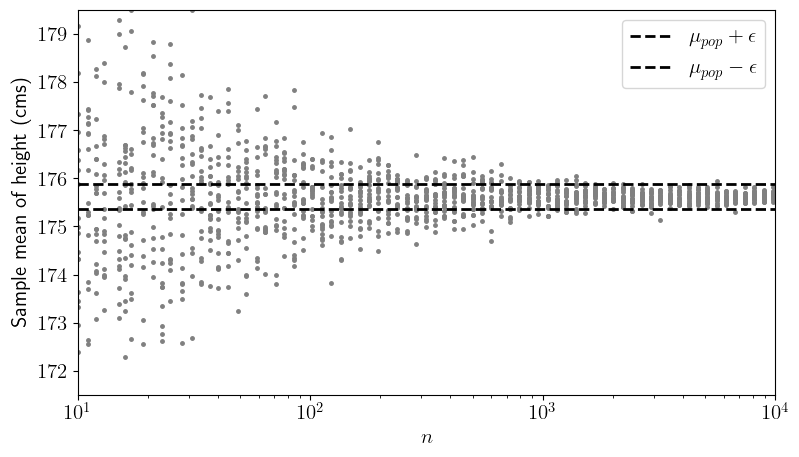

In [8]:
# Illustration of convergence in probability and the law of large numbers
# For any fixed epsilon, if we increase the number of samples enough, the sample mean is within epsilon of the population mean
tries = 20
n_max_exp = 4
n_num = 100
n_vals = np.round(np.logspace(1,5,num=n_num)).astype(int)# np.arange(1,n_max,1))
n_max = 10**n_max_exp
sample_mean_average = np.zeros(N)
sample_mean_std = np.zeros(N)
eps = 0.25

ymin = 171.5
ymax = 179.5

plt.figure(figsize=(9,5))
plt.xticks(fontsize=font_size) 
plt.yticks(fontsize=font_size)
plt.ylim(ymin,ymax)
plt.xlim(10,n_max)
for ind_n,n in enumerate(n_vals):
    sample_means = np.zeros(tries)
    for ind_tries in range(tries):
        samples = rng.choice(stature,n,replace=True)
        sample_means[ind_tries] = np.mean(samples)
    plt.semilogx(n * np.ones(tries),sample_means,'.',markersize=5,color="gray",rasterized=True)
    sample_mean_average[ind_n] = np.mean(sample_means)
    sample_mean_std[ind_n] = np.std(sample_means) 
plt.semilogx(n_vals,np.ones(len(n_vals))*(population_mean+eps),lw=2,ls='dashed',color='black',
         label=r"$\mu_{pop}+\epsilon$")
plt.semilogx(n_vals,np.ones(len(n_vals))*(population_mean-eps),lw=2,ls='dashed',color='black',
         label=r"$\mu_{pop}-\epsilon$")
plt.xlabel(r"$n$",fontsize=font_size)
plt.ylabel(r'Sample mean of height (cms)',fontsize=font_size,labelpad=5)
plt.legend(fontsize=font_size);

In [9]:
# Monte Carlo estimate of the probability that the absolute difference between the population mean and the sample mean
# is greater than epsilon 
epsilon = 1
tries = int(1e5)
n_vals = np.logspace(np.log10(15),np.log10(700),5).astype(int) 
probs = np.zeros(len(n_vals))
for ind_n,n in enumerate(n_vals):
    count_epsilon = 0.0
    for ind_tries in range(tries):
        samples = rng.choice(stature,n,replace=True)
        sample_mean = np.mean(samples)
        if np.abs(sample_mean-population_mean) > epsilon:
            count_epsilon+=1
    probs[ind_n] = count_epsilon / tries

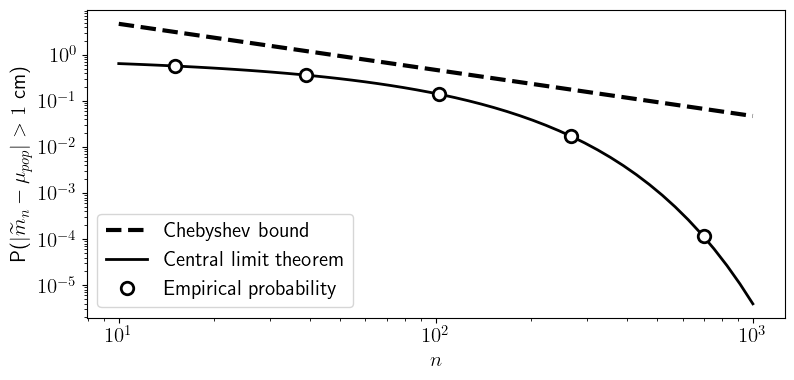

In [10]:
# Comparison of the Chebyshev bound used to prove the law of large numbers, and the approximation provided by the central limit theorem
n_vals = np.logspace(np.log10(15),np.log10(700),5).astype(int)
n_plot = np.logspace(1,3)
chebyshev_bound = population_std**2/(epsilon**2)/n_plot
clt_bound = np.zeros(len(n_plot))
for ind_n,n in enumerate(n_plot):
    epsilon_standardized = epsilon * np.sqrt(n) / population_std
    clt_bound[ind_n] = 2*(1-norm.cdf(epsilon_standardized,0,1))

plt.figure(figsize=(9,4))
plt.xticks(fontsize=font_size) 
plt.yticks(fontsize=font_size)
plt.loglog(n_plot,chebyshev_bound,lw=3,ls='dashed',color='black',label="Chebyshev bound")
plt.loglog(n_plot,clt_bound,lw=2,ls='solid',color='black',label="Central limit theorem")
plt.loglog(n_vals,probs,'o',markersize=9,markerfacecolor='white',markeredgecolor="black",markeredgewidth=2,
           label="Empirical probability")
plt.legend(fontsize=font_size)
plt.xlabel(r"$n$",fontsize=font_size)
plt.ylabel(r'P($|\widetilde{m}_n-\mu_{pop}|>1$ cm)',fontsize=font_size,labelpad=5);

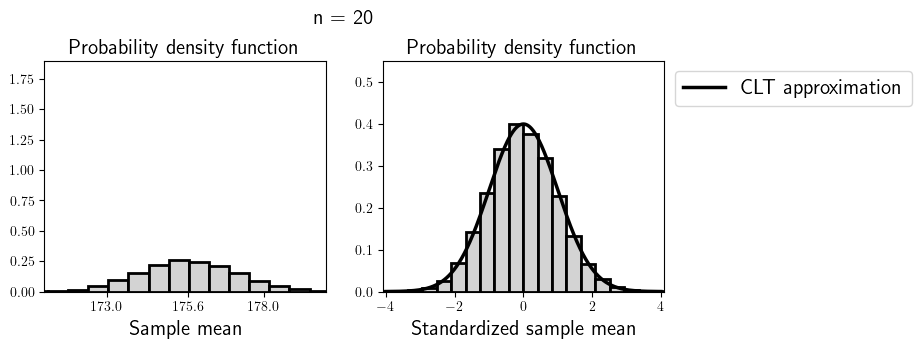

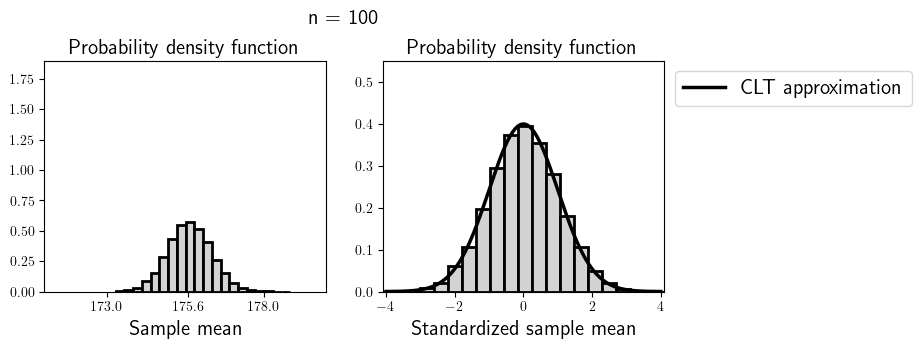

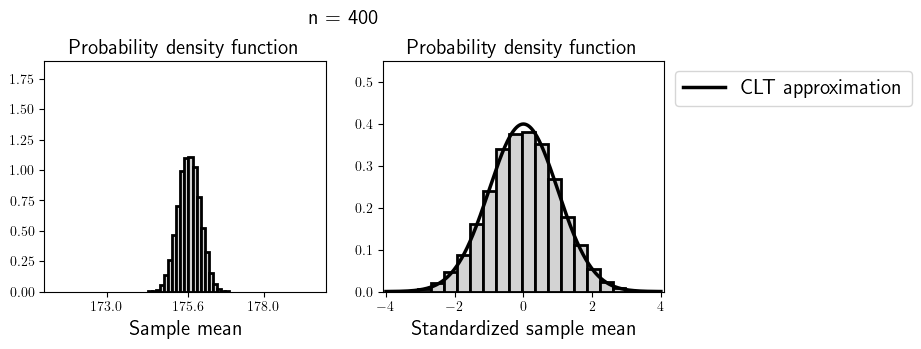

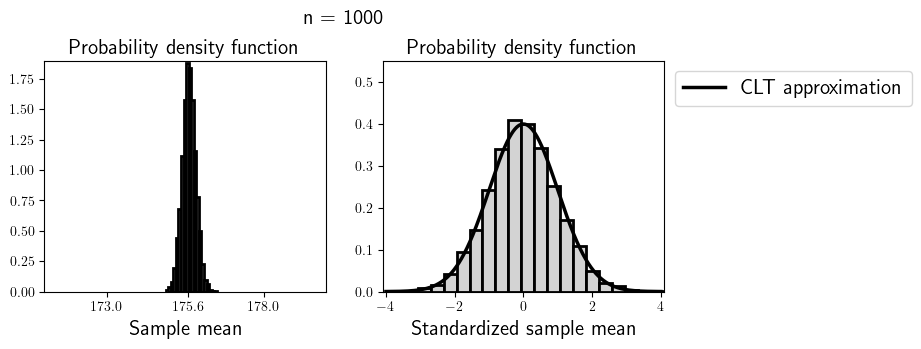

In [12]:
# Illustration of the central limit theorem, the sample mean converges to a Gaussian random variable in distribution
tries = int(1e4)
n_vals = [20,100,400,1000]
n_bins = 20
x = np.arange(-4,4+1e-2,1e-2)
x_min = 171
x_max = 180
y_max = 1.9
x_min_norm = -4.1
x_max_norm = 4.1
y_max_norm = 0.55
for ind_n,n in enumerate(n_vals):
    sample_means = np.zeros(tries)
    for ind_tries in range(tries):
        samples = rng.choice(stature,n,replace=True)
        sample_means[ind_tries] = np.mean(samples)
    sample_mean_average[ind_n] = np.mean(sample_means)
    sample_mean_std[ind_n] = np.std(sample_means)  

    fig, axes = plt.subplots(1, 2, figsize=(8,3),width_ratios=[1,1])
    fig.suptitle("n = " + str(n),fontsize=font_size,y = 1.05)

    axes[0].set_xticks([173,175.6,178]) 
    axes[0].hist(sample_means,bins=n_bins,color='lightgray', edgecolor='black',
              linewidth=2,density=True)
    axes[0].set_ylim([0,y_max])
    axes[0].set_xlim([x_min,x_max])
    axes[0].set_title(r"Probability density function",fontsize=font_size,pad = 5)
    axes[0].set_xlabel(r"Sample mean",fontsize=font_size,labelpad = 5)
    
    axes[1].hist((sample_means-population_mean)/(population_std / np.sqrt(n)),bins=n_bins,color='lightgray', edgecolor='black',
              linewidth=2,density=True)
    axes[1].plot(x,norm.pdf(x,0,1),lw=2.5,color="black",label='CLT approximation')
    axes[1].set_title(r"Probability density function",fontsize=font_size,pad = 5)
    axes[1].set_xlabel(r"Standardized sample mean",fontsize=font_size,labelpad = 5)
    axes[1].legend(fontsize=font_size_legend,bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    axes[1].set_ylim([0,y_max_norm])
    axes[1].set_xlim([x_min_norm,x_max_norm]);